Project Planning Stage  
Group-009-36 

**Data Description — players.csv**

The `players.csv` dataset contains activity data for each participant in the Minecraft research project. Each row represents one player, identified by a hashed email. The dataset includes **196 observations** and **7 variables**.

**Key Variables**

| Variable | Type | Description |
|-----------|------|-------------|
| `experience` | string | Player’s experience level (e.g., Pro, Veteran, Regular, Amateur). |
| `subscribe` | boolean | Whether the player subscribed to the newsletter. |
| `hashedEmail` | string | Unique player identifier. |
| `played_hours` | float | Number of hours played. |
| `name` | string | Player’s name (non-identifiable). |
| `gender` | string | Player’s gender. |
| `Age` | float | Player’s age in years. |

**Summary Statistics (rounded to 2 decimals)**

| Statistic | `played_hours` | `Age` |
|------------|----------------|--------|
| Mean | 5.85 | 21.14 |


**Observations and Issues**

Most players recorded short playtime, but a few logged over 200 hours, meaning the distribution is **uneven**, with most values being low and a few extremely high ones (outliers). The `Age` variable has **2 missing values**, and `experience` includes multiple categorical levels requiring encoding for analysis. The `name` field is purely nominal and can be ignored. 

**Collection Notes**

The data were collected by a **UBC research group in Computer Science**, led by **Professor Frank Wood**




 **Data Description — sessions.csv**

The `sessions.csv` dataset logs individual play sessions from the UBC Minecraft research server.  
Each row is **one session** linked to a player in `players.csv` via a hashed email.  
The dataset contains **1,535 observations** and **5 variables**.

**Variables**

| Variable | Type | Description |
|-----------|------|-------------|
| `hashedEmail` | string | Player identifier linking to `players.csv`. |
| `start_time` | string | start time of the session. |
| `end_time` | string | end time of the session. |
| `original_start_time` | float | Start time in **milliseconds**. |
| `original_end_time` | float | End time in **milliseconds**. |

**One-number summaries (rounded to 2 decimals)**  
- **Mean `original_start_time`:** 1.72e+12 
- **Mean `original_end_time`:** 1.72e+12


**Observations & issues**  
- Most sessions cluster in mid-2024; a **few very large timestamps** indicate an **uneven** distribution.  
- `end_time` / `original_end_time` have **2 missing values** 

**Data source**  
The data were collected by a **UBC research group in Computer Science**, led by **Professor Frank Wood**

**Research Question**  

Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.  
“Can a player's gender and experience level predict their total play time (played_hours)?”





 **Exploratory Data Analysis and Visualization**

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


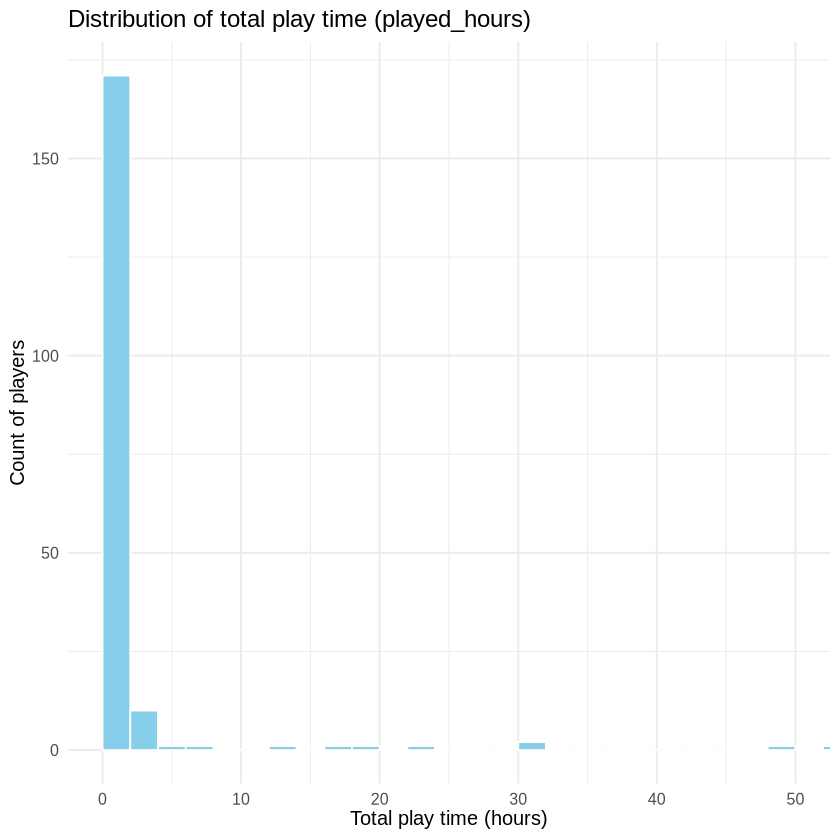

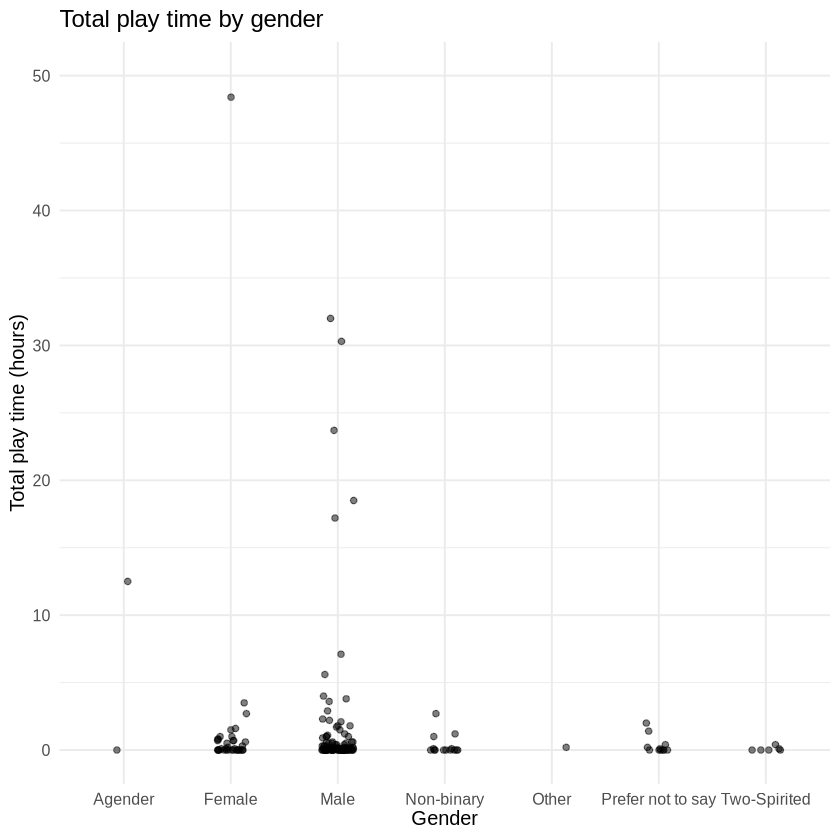

In [11]:
## (3) Exploratory Data Analysis and Visualization

# 3.1 Loading the dataset

# Load required packages
library(tidyverse)

# Read the players dataset (change the path if needed)
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

players_summary <- players |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age          = mean(Age,           na.rm = TRUE)
  )
players_summary

ggplot(players, aes(x = played_hours)) +
  geom_histogram(binwidth = 2, boundary = 0, color = "white", fill = "skyblue") +
  coord_cartesian(xlim = c(0, 50)) +   
  labs(
    title = "Distribution of total play time (played_hours)",
    x = "Total play time (hours)",
    y = "Count of players"
  ) +
  theme_minimal(base_size = 12)

ggplot(players, aes(x = gender, y = played_hours)) +
  geom_point(
    alpha    = 0.5,
    position = position_jitter(width = 0.15, height = 0)
  ) +
  coord_cartesian(ylim = c(0, 50)) +
  labs(
    title = "Total play time by gender",
    x     = "Gender",
    y     = "Total play time (hours)"
  ) +
  theme_minimal(base_size = 12)
## From the histogram of `played_hours`, we see that most players have very low total play time (mostly under 5 hours), 
## with a few extreme outliers who play dozens of hours. 

##The scatter plot of `played_hours` by `gender` shows that Male and Female players cover almost the whole range of play times, 
##including the heavy-play outliers, while the other gender categories have fewer players and mostly low play times.
##There is some difference between groups (e.g., most heavy players are Male), but there is still a lot of overlap, which suggests that `played_hours` alone may only weakly predict a player’s gender.


## Methods and Plan

**Method chosen:** *Linear regression*

### Why is this method appropriate?
Linear regression is appropriate because the response variable (played_hours) is continuous, and the model allows us to quantify how mean play time differs across gender and experience groups in a statistically interpretable way.

### Assumptions
This method assumes that group differences can be reasonably represented through a linear model

### Potential limitations
Some gender and experience categories have very small sample sizes, which may lead to unstable estimates and reduced reliability for those groups.

### Model comparison and selection
I will fit a linear regression model using gender and experience level to predict total play time (played_hours).  
Since linear regression does not require tuning a hyperparameter like k, model comparison will focus on evaluating different model specifications.
### Data processing and splitting
Before modeling, I will split the data into training and test sets (about 80/20). Because some gender and experience categories have small sample sizes, I will use a stratified split to preserve the distribution of these categories in both sets.  

I will fit the linear regression model only on the training set, and then evaluate its performance using RMSE on the test set. If multiple model specifications are compared, the same data split and evaluation metric will be used to ensure consistency.

 **GitHub Repository**
 https://github.com/uiuikmn/dsci-100-project.git